In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, MolFromSmiles, MolToSmiles

# Preprocess

In [4]:
df = pd.read_table('data/chembl_25_chemreps.txt')
L = len(df)
print(L)
df.head()

1870461


,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key
0,CHEMBL153534,Cc1cc(cn1C)c2csc(N=C(N)N)n2,InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10...,MFRNFCWYPYSFQQ-UHFFFAOYSA-N
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-11...,RSEQNZQKBMRQNM-VRGFNVLHSA-N
2,CHEMBL440245,CCCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCCN...,InChI=1S/C160H268N50O41/c1-23-27-41-95-134(228...,FTKBTEIKPOYCEX-OZSLQWTKSA-N
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](N...,InChI=1S/C124H154ClN21O39/c1-57(2)48-81-112(17...,UYSXXKGACMHPIM-KFGDMSGDSA-N
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN4CCOCC4,InChI=1S/C19H21BrN6O/c20-15-2-1-3-17(18(15)22-...,VDSXZXJEWIWBCG-UHFFFAOYSA-N


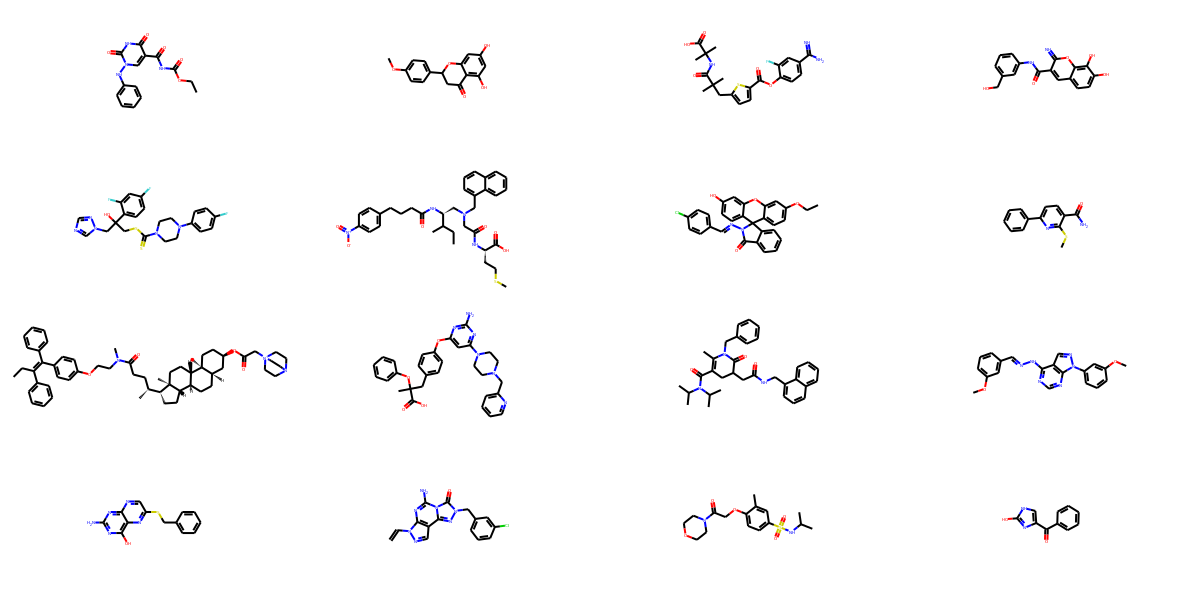

In [5]:
rands = np.random.choice(L, 16, replace=False)
smiles = df.iloc[rands]['canonical_smiles'].values
mols = []
for s in smiles:
    if s is None:
        continue
    mol = MolFromSmiles(s)
    if mol is not None:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,150))

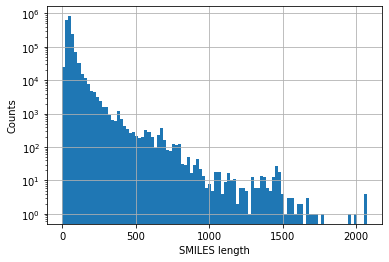

In [6]:
lengths = list(map(len, df['canonical_smiles'].values))

plt.hist(lengths, bins=100)
plt.grid()
plt.xlabel('SMILES length')
plt.ylabel('Counts')
plt.yscale('log')

Text(0, 0.5, 'Counts')

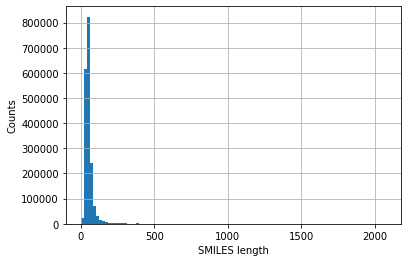

In [7]:
plt.hist(lengths, bins=100)
plt.grid()
plt.xlabel('SMILES length')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

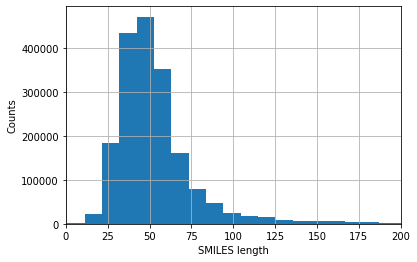

In [8]:
plt.hist(lengths, bins=200)
plt.grid()
plt.xlim([0,200])
plt.xlabel('SMILES length')
plt.ylabel('Counts')

In [9]:
np.sum(np.array(lengths)<=100)/L*100

94.526483043485

In [10]:
df_sub = df[np.array(lengths)<=100]
print(len(df_sub))

1768081


In [11]:
lengths2 = list(map(len, df_sub['canonical_smiles'].values))
print(np.max(lengths2))

100


In [12]:
df_sub.to_csv('data/chembl_25_100.csv', index=False)

In [13]:
df = pd.read_table('data/chembl_24_chemreps.txt')
L = len(df)
print(L)
df.head()

1820035


,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key
0,CHEMBL153534,Cc1cc(cn1C)c2csc(N=C(N)N)n2,InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10...,MFRNFCWYPYSFQQ-UHFFFAOYSA-N
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-11...,RSEQNZQKBMRQNM-VRGFNVLHSA-N
2,CHEMBL440245,CCCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCCN...,InChI=1S/C160H268N50O41/c1-23-27-41-95-134(228...,FTKBTEIKPOYCEX-OZSLQWTKSA-N
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](N...,InChI=1S/C124H154ClN21O39/c1-57(2)48-81-112(17...,UYSXXKGACMHPIM-KFGDMSGDSA-N
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN4CCOCC4,InChI=1S/C19H21BrN6O/c20-15-2-1-3-17(18(15)22-...,VDSXZXJEWIWBCG-UHFFFAOYSA-N


In [14]:
smiles  = df['canonical_smiles'].values
to_drop = []
for i,sm in enumerate(smiles):
    if len(sm)>100:
        to_drop.append(i)
    if df['chembl_id'][i]=='CHEMBL1201364':
        to_drop.append(i)
print(len(to_drop))

97738


In [15]:
df_dropped = df.drop(to_drop)
df_dropped = df_dropped.drop(['standard_inchi', 'standard_inchi_key'], axis=1)
L = len(df_dropped)
print(L)
df_dropped.head()

1722297


,chembl_id,canonical_smiles
0,CHEMBL153534,Cc1cc(cn1C)c2csc(N=C(N)N)n2
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN4CCOCC4
5,CHEMBL503634,COc1c(O)cc(O)c(C(=N)Cc2ccc(O)cc2)c1O
6,CHEMBL503643,CCOC(=O)c1cc2cc(ccc2[nH]1)C(=O)O
8,CHEMBL503870,C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](C)C(=O)NN...


In [16]:
df_dropped.to_csv('data/chembl_24.csv', index=False)

In [17]:
smiles = df['canonical_smiles'].values

# words = ['Cl', 'Br', 'At', 'Se', 'As', 'Si', 'Be', 'Ca', 'Mg', 'Li', 'Na', 'P+', 'O-', 'S-', 'Se-', 'N+', 'As+', 'Na+', 'Li+', 'H+',\
#         'K+', 'F-', 'Cl-', 'Br-', 'I-']
# for w in words:
#     cnt = 0
#     for smile in smiles:
#         if w in smile:
#             if cnt<5:
#                 print(smile)
#             cnt += 1
#     print(w, cnt/L*100, '\n')

In [18]:
smiles = df['canonical_smiles'].values
pro_sms = []
for sm in smiles:
    sm = ' '.join(list(sm))
    before = ['C l -', 'C l', 'O -', 'N +', 'n +', 'B r -', 'B r', 'N a +', 'N a', 'I -', 'S i']
    after = ['Cl-', 'Cl', 'O-', 'N+', 'n+', 'Br-', 'Br', 'Na+', 'Na', 'I-', 'Si']
    for b,a in zip(before, after):
        sm = sm.replace(b, a)
    pro_sms.append(sm)

In [19]:
df['processed_smiles'] = pro_sms
df.head()

,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key,processed_smiles
0,CHEMBL153534,Cc1cc(cn1C)c2csc(N=C(N)N)n2,InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10...,MFRNFCWYPYSFQQ-UHFFFAOYSA-N,C c 1 c c ( c n 1 C ) c 2 c s c ( N = C ( N ) ...
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-11...,RSEQNZQKBMRQNM-VRGFNVLHSA-N,C C [ C @ H ] ( C ) [ C @ H ] ( N C ( = O ) [ ...
2,CHEMBL440245,CCCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCCN...,InChI=1S/C160H268N50O41/c1-23-27-41-95-134(228...,FTKBTEIKPOYCEX-OZSLQWTKSA-N,C C C C [ C @ H ] ( N C ( = O ) [ C @ H ] ( C ...
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](N...,InChI=1S/C124H154ClN21O39/c1-57(2)48-81-112(17...,UYSXXKGACMHPIM-KFGDMSGDSA-N,C C ( C ) C [ C @ @ H ] 1 N C ( = O ) C N C ( ...
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN4CCOCC4,InChI=1S/C19H21BrN6O/c20-15-2-1-3-17(18(15)22-...,VDSXZXJEWIWBCG-UHFFFAOYSA-N,Br c 1 c c c c ( N c 2 n c n c 3 c c n c c 2 3...


In [20]:
to_drop = []
for i,sm in enumerate(smiles):
    if len(sm)>100:
        to_drop.append(i)
print(len(to_drop))

97737


In [21]:
df_dropped = df.drop(to_drop)
df_dropped = df_dropped.drop(['standard_inchi', 'standard_inchi_key'], axis=1)
L = len(df_dropped)
print(L)
df_dropped.head()

1722298


,chembl_id,canonical_smiles,processed_smiles
0,CHEMBL153534,Cc1cc(cn1C)c2csc(N=C(N)N)n2,C c 1 c c ( c n 1 C ) c 2 c s c ( N = C ( N ) ...
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN4CCOCC4,Br c 1 c c c c ( N c 2 n c n c 3 c c n c c 2 3...
5,CHEMBL503634,COc1c(O)cc(O)c(C(=N)Cc2ccc(O)cc2)c1O,C O c 1 c ( O ) c c ( O ) c ( C ( = N ) C c 2 ...
6,CHEMBL503643,CCOC(=O)c1cc2cc(ccc2[nH]1)C(=O)O,C C O C ( = O ) c 1 c c 2 c c ( c c c 2 [ n H ...
8,CHEMBL503870,C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](C)C(=O)NN...,C [ C @ H ] ( N C ( = O ) O C c 1 c c c c c 1 ...


In [22]:
df_dropped.to_csv('data/chembl_24.csv')

In [23]:
smiles = df_dropped['processed_smiles'].values
rands = np.random.choice(L, L, replace=False)
test_size = 10000

with open('data/sentence_test.txt', 'a') as f:
    for i in range(0, test_size):
        f.write(smiles[rands[i]]+'\n')
        
with open('data/sentence_train.txt', 'a') as f:
    for i in range(test_size, L):
        f.write(smiles[rands[i]]+'\n')

# Create vocabulary

In [24]:
smiles = df_dropped['processed_smiles'].values
vocab = []
for sm in smiles:
    l = sm.split(' ')
    for w in l:
        if w not in vocab:
            vocab.append(w)

with open('data/vocab.txt', 'a') as f:
    for v in vocab:
        f.write(v+'\n')

# Solubility dataset

In [35]:
df_sol = pd.read_csv('data/curated-solubility-dataset.csv', usecols=[4, 5])
df_sol.head()

,SMILES,Solubility
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,O=C1Nc2cccc3cccc1c23,-3.254767
2,Clc1ccc(C=O)cc1,-2.177078
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065


In [4]:
df_sol = pd.read_csv('data/solubility.csv')
df_sol.head()

,SMILES,unknown,solubility
0,O=C(C)N,60-35-5,1.58
1,NNC,60-34-4,1.34
2,O=C(C)O,64-19-7,1.22
3,N1CCCC1,123-75-1,1.15
4,O=C(N)NO,127-07-1,1.12


In [36]:
smiles = df_sol['SMILES'].values
pro_sms = []
for sm in smiles:
    sm = ' '.join(list(sm))
    before = ['C l -', 'C l', 'O -', 'N +', 'n +', 'B r -', 'B r', 'N a +', 'N a', 'I -', 'S i']
    after = ['Cl-', 'Cl', 'O-', 'N+', 'n+', 'Br-', 'Br', 'Na+', 'Na', 'I-', 'Si']
    for b,a in zip(before, after):
        sm = sm.replace(b, a)
    pro_sms.append(sm)

df_sol['processed_smiles'] = pro_sms
df_sol.head()

,SMILES,Solubility,processed_smiles
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,[ Br- ] . C C C C C C C C C C C C C C C C C C ...
1,O=C1Nc2cccc3cccc1c23,-3.254767,O = C 1 N c 2 c c c c 3 c c c c 1 c 2 3
2,Clc1ccc(C=O)cc1,-2.177078,Cl c 1 c c c ( C = O ) c c 1
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,[ Z n+ + ] . C C ( c 1 c c c c c 1 ) c 2 c c (...
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,C 1 O C 1 C N ( C C 2 C O 2 ) c 3 c c c ( C c ...


In [37]:
df_sol.to_csv('data/solubility.csv', index=None)

In [38]:
df_sol = pd.read_csv('data/solubility.csv')
df_sol.head()

,SMILES,Solubility,processed_smiles
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,[ Br- ] . C C C C C C C C C C C C C C C C C C ...
1,O=C1Nc2cccc3cccc1c23,-3.254767,O = C 1 N c 2 c c c c 3 c c c c 1 c 2 3
2,Clc1ccc(C=O)cc1,-2.177078,Cl c 1 c c c ( C = O ) c c 1
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,[ Z n+ + ] . C C ( c 1 c c c c c 1 ) c 2 c c (...
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,C 1 O C 1 C N ( C C 2 C O 2 ) c 3 c c c ( C c ...


In [39]:
N = len(df_sol)
test_size = int(N*0.25)
rands = np.random.choice(N,N, replace=False)
df_test = df_sol.iloc[rands[:test_size]]
print("Test size", len(df_test))
df_train = df_sol.iloc[rands[test_size:]]
print("Train size", len(df_train))

Test size 2495
Train size 7487


In [41]:
df_train.to_csv('data/sol_train.csv', index=None)
df_test.to_csv('data/sol_test.csv', index=None)